In [ ]:
import pandas as pd
import numpy as np
from math import log2
import matplotlib.pyplot as plt

def calculate_entropy_from_counts(counts):
    """Entropy given a list of counts."""
    total = sum(counts)
    probs = [c/total for c in counts if c > 0]   
    return -sum(p * log2(p) for p in probs)


def entropy_categorical(series):
    """Entropy for categorical column."""
    counts = series.value_counts().tolist()
    return calculate_entropy_from_counts(counts)


def entropy_numerical(series, bins=10):
    """Entropy for numerical column (using binning)."""
    counts, _ = np.histogram(series.dropna(), bins=bins)
    return calculate_entropy_from_counts(counts)


df = pd.read_csv("Housing.csv") 
df1=pd.read_csv("advertising.csv") 


In [ ]:
col_entropies = {}

for col in df.columns:
    if df[col].dtype == "object" or df[col].dtype.name == "category":
        col_entropies[col] = entropy_categorical(df[col])
    else:
        col_entropies[col] = entropy_numerical(df[col])

col_entropies


{'price': 2.5584120118580436,
 'area': 2.4165782102155973,
 'bedrooms': 1.5783764246200245,
 'bathrooms': 0.9447864125469403,
 'stories': 1.6013354416692476,
 'mainroad': 0.5875926904926543,
 'guestroom': 0.6756416842992281,
 'basement': 0.9344770602437216,
 'hotwaterheating': 0.26859376366582177,
 'airconditioning': 0.8995281870698584,
 'parking': 1.5476148578504698,
 'prefarea': 0.7863917038359864,
 'furnishingstatus': 1.557256126637955}

In [ ]:
col_entropies1 = {}

for col in df1.columns:
        col_entropies1[col] = entropy_numerical(df1[col])

col_entropies1


{'TV': 3.2985207460435655,
 'Radio': 3.2895809469720865,
 'Newspaper': 2.7522029952412814,
 'Sales': 3.053043355558367}

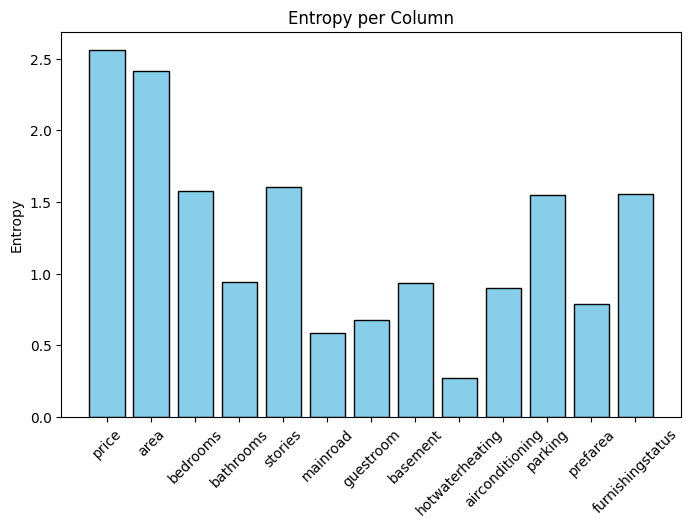

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(col_entropies.keys(), col_entropies.values(), color="skyblue", edgecolor="black")
plt.ylabel("Entropy")
plt.title("Entropy per Column")
plt.xticks(rotation=45)
plt.show()


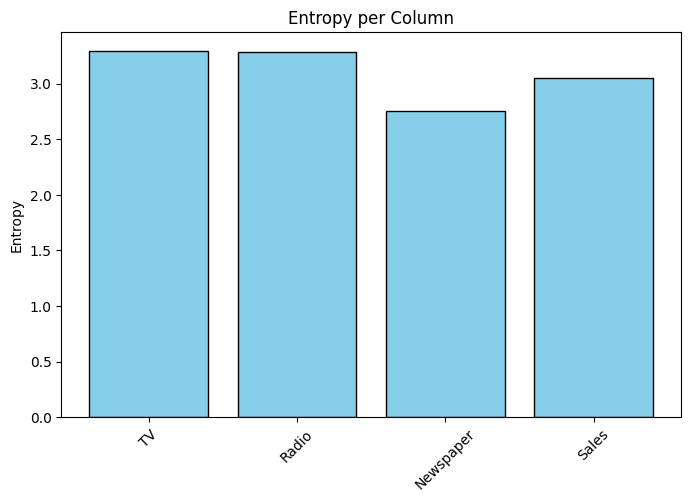

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(col_entropies1.keys(), col_entropies1.values(), color="skyblue", edgecolor="black")
plt.ylabel("Entropy")
plt.title("Entropy per Column")
plt.xticks(rotation=45)
plt.show()
